In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

/zfsauton/home/yz6/miniconda3/envs/mypython3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/zfsauton/home/yz6/miniconda3/envs/mypython3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


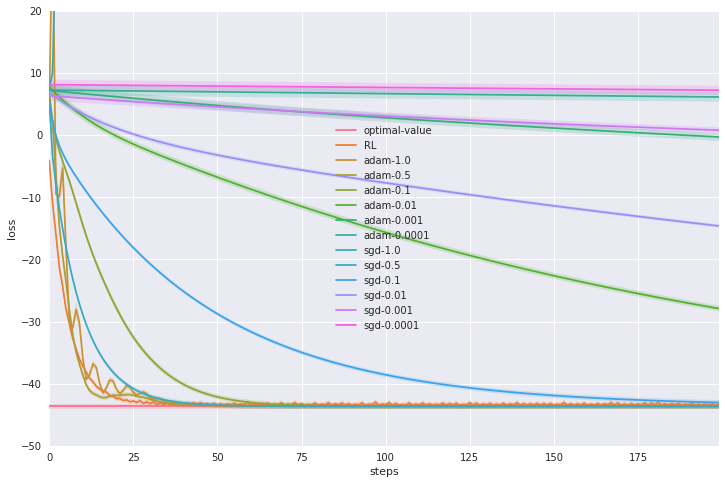

In [2]:
def plot_data(x, mean, label, color, y_lim):
    plt.ylim(y_lim, 20)
    plt.xlim(1, 201)
    data = mean
#     print(data.shape)
    ax = sns.tsplot(data, condition=label, color=color)
    ax.set(xlabel='steps', ylabel='loss')
#     return fig

data_dir = '../logs/quadratic/lr_0.01_bs_64_dim_100_hid_10_gamma_1_eps_10000_steps_200'
env = 'quadratic'
save_path = f'{data_dir}/plot.pdf'


optims = ['adam', 'sgd']
# base_lrs = [1.0, 0.5, 0.1, 0.01, 0.001, 1e-4]
base_lrs = [1.0, 0.5, 0.1, 0.01, 0.001, 1e-4]

steps = 200
x = np.arange(steps)
y = -50
palette = sns.color_palette("husl",  n_colors=15)

n = 0
pm =  f'{data_dir}/meta_func_vals.npy'
m = np.load(pm)

fig = plt.figure(0, figsize=(12,8))
if env == 'quadratic':
    data = np.load(f'{data_dir}/optimal_value.npy')
    ax = sns.tsplot(np.tile(data.reshape(-1, 1), (1, steps)), condition='optimal-value', color=palette[n])
    n+=1
plot_data(x=x, mean=m, label='RL', color=palette[n], y_lim=y)
n+=1
for opt in optims:
    for lr  in base_lrs:
        pm =  f'{data_dir}/opt_{opt}_lr_{lr}_func_vals.npy'
        m = np.load(pm)
        plot_data(x=x, mean=m, label=f'{opt}-{lr}', color=palette[n], y_lim=y)
        n+=1
  
fig.savefig(save_path, bbox_inches='tight')      
fig.show()
